In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [3]:
# load the dataset
data=pd.read_csv(r'job_market_trends.csv')
data.head()

,country,year,industry,avg_salary_usd,unemployment_rate,job_openings,remote_work_ratio,education_level,tech_adoption_index,automation_risk,gdp_growth_rate,population_millions,demand_growth,ai_influence_index,trend_category
0,UK,2025,Agriculture,146887,14.676792,30914,81.309025,Master,0.060711,0.608409,5.640715,923.745602,7.614825,0.941882,Growing
1,Japan,2020,Energy,79121,8.748749,31437,98.673808,High School,0.222692,0.723032,9.995673,102.560420,6.457114,0.695953,Growing
2,Australia,2016,Finance,49157,5.511180,35664,70.595622,PhD,0.382708,0.935650,0.280710,269.329881,18.870691,0.882562,Stable
3,Canada,2020,Healthcare,106962,4.824581,29985,0.832802,PhD,0.088014,0.027215,1.664101,1039.931056,18.389537,0.862061,Stable
4,UK,2010,Education,137895,7.255431,10260,54.213702,PhD,0.756544,0.021767,3.066966,9.521678,-8.835339,0.549276,Stable


In [4]:
# data is already cleaned and preprocessed we will split the data into features and target variable
# X is the feature set and y is the target variable
x= data.drop('avg_salary_usd', axis=1)
y= data['avg_salary_usd']
# split the data into training and testing sets 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)    
 
# label encoding for categorical variables
x_train= pd.get_dummies(x_train, drop_first=True)
x_test= pd.get_dummies(x_test, drop_first=True)
# align the train and test dataframes by the columns
x_train, x_test= x_train.align(x_test, join='left', axis=1, fill_value=0)

# create a linear regression model
model= LinearRegression()
# fit the model on the training data
model.fit(x_train, y_train)
# predict on the test data
y_pred= model.predict(x_test)
# evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')



Mean Absolute Error: 32414.7248770257
Mean Squared Error: 1404931983.4952676
R2 Score: -0.0006128789139208113


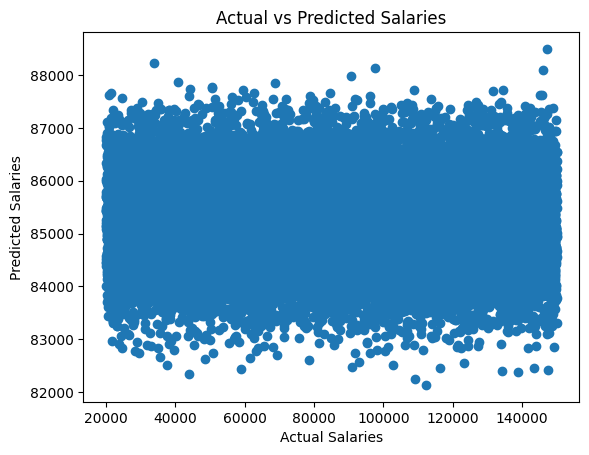

In [5]:
# visualize the results
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Salaries')

plt.ylabel('Predicted Salaries')

plt.title('Actual vs Predicted Salaries')

plt.show()


In [6]:
# example prediction (use the same feature names as used to build `x` / x_train)
example = pd.DataFrame({
    'country': ['USA'],
    'year': [2023],
    'industry': ['IT'],
    'unemployment_rate': [5.0],
    'job_openings': [1000],
    'remote_work_ratio': [50],
    'education_level': ['Master'],
    'tech_adoption_index': [0.8],
    'automation_risk': [0.3],
    'gdp_growth_rate': [2.5],
    'population_millions': [330.0],
    'demand_growth': [5.0],
    'ai_influence_index': [0.7],
    'trend_category': ['Growing']
})

# encode categorical variables the same way as during training
example = pd.get_dummies(example, drop_first=True)

# align to training columns (adds any missing columns with zeros, and orders them)
# Use reindex to ensure the example has exactly the same columns (and order) as x_train
example = example.reindex(columns=x_train.columns, fill_value=0)

# predict
predicted_salary = model.predict(example)
print(f'Predicted Salary for the example job posting: ${predicted_salary[0]:.2f}')


Predicted Salary for the example job posting: $84657.24


In [9]:
# Save the trained model together with the training feature columns
# This file will be picked up by the Streamlit app which looks for a 'columns' list.
import joblib
# Save a combined object with model and column names used during training
joblib.dump({'model': model, 'columns': x_train.columns.tolist()}, 'model_with_columns.joblib')
# (optional) also keep the original single-model file for compatibility
joblib.dump(model, 'job_market_salary_model.pkl')

['job_market_salary_model.pkl']